In [ ]:
pip install -U scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


23.793103448275854


<ipython-input-26-c4af7b3803b8>:62: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir='z',offset=9,cmap='viridis',anpha=0.5)
<ipython-input-26-c4af7b3803b8>:63: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir='x',offset=11,cmap='viridis',anpha=0.5)
<ipython-input-26-c4af7b3803b8>:64: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir='y',offset=11,cmap='viridis',anpha=0.5)


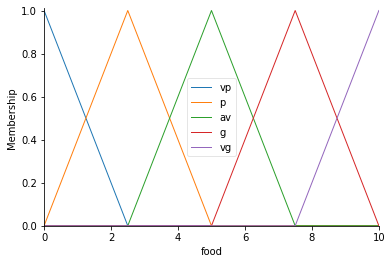

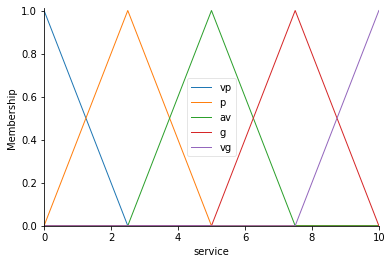

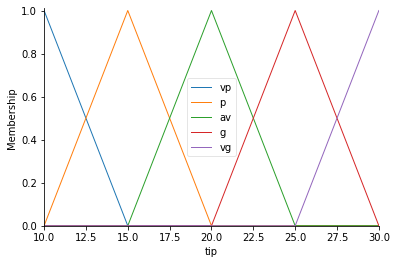

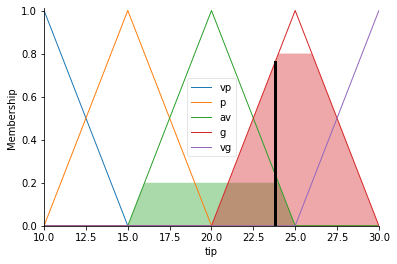

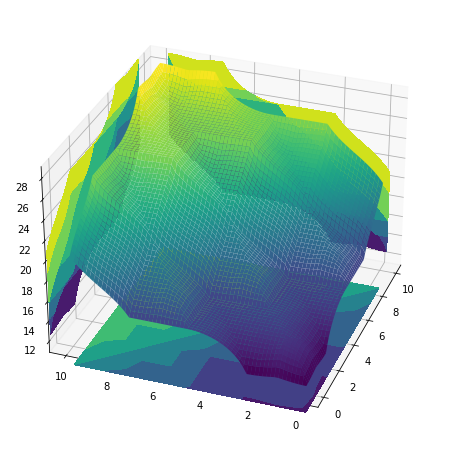

In [ ]:
import numpy as np
import skfuzzy as fuzz 
import matplotlib.pyplot as plt 
from skfuzzy import control as ctrl

from mpl_toolkits.mplot3d import Axes3D

universe = np.linspace(0,10,61)
universe1 = np.linspace(10,30,61)

food = ctrl.Antecedent(universe,'food')
service = ctrl.Antecedent(universe,'service')
tip = ctrl.Consequent(universe1,'tip')

names=['vp','p','av','g','vg']

food.automf(names= names)
service.automf(names= names)
tip.automf(names= names)

food.view()
service.view()
tip.view()

rule0 = ctrl.Rule(antecedent = ((food['vp']&service['vp'])|(food['vp']&service['p'])|
                                 (food['p']&service['vp'])), consequent = tip['vp'], label = 'rule vp')
rule1 = ctrl.Rule(antecedent = ((food['av']&service['vp'])|(food['g']&service['vp'])|
                                 (food['av']&service['p'])|(food['p']&service['av'])|
                                 (food['vp']&service['g'])|(food['p']&service['p'])|
                                 (food['vp']&service['av'])), consequent = tip['p'], label = 'rule p')
rule2 = ctrl.Rule(antecedent = ((food['vg']&service['vp'])|(food['g']&service['p'])|
                                 (food['av']&service['av'])|(food['p']&service['g'])|
                                 (food['vp']&service['vg'])), consequent = tip['av'], label = 'rule av')
rule3 = ctrl.Rule(antecedent = ((food['vg']&service['p'])|(food['vg']&service['av'])|
                                 (food['g']&service['av'])|(food['g']&service['g'])|
                                 (food['av']&service['g'])|(food['av']&service['vg'])|
                                 (food['p']&service['vg'])), consequent = tip['g'], label = 'rule g')
rule4 = ctrl.Rule(antecedent = ((food['vg']&service['g'])|(food['vg']&service['vg'])|
                                 (food['g']&service['vg'])), consequent = tip['vg'], label = 'rule vg')

system = ctrl.ControlSystem([rule0,rule1,rule2, rule3, rule4])
sim = ctrl.ControlSystemSimulation(system)
sim.input['food']= 5
sim.input['service']= 7
sim.compute()
print(sim.output['tip'])
tip.view(sim=sim)

upsampled = np.linspace(00,10,61)
x,y = np.meshgrid(upsampled,upsampled)
z= np.zeros_like(x)
for i in range(61):
  for j in range(61):
    sim.input['food'] = x[i,j]
    sim.input['service'] = y[i,j]
    sim.compute()
    z[i,j] = sim.output['tip']

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection = '3d')
suf = ax.plot_surface(x,y,z,rstride=1,cstride=1,cmap='viridis',linewidth=0.4,antialiased=True)
cset = ax.contourf(x,y,z,zdir='z',offset=9,cmap='viridis',anpha=0.5)
cset = ax.contourf(x,y,z,zdir='x',offset=11,cmap='viridis',anpha=0.5)
cset = ax.contourf(x,y,z,zdir='y',offset=11,cmap='viridis',anpha=0.5)
ax.view_init(30,200)


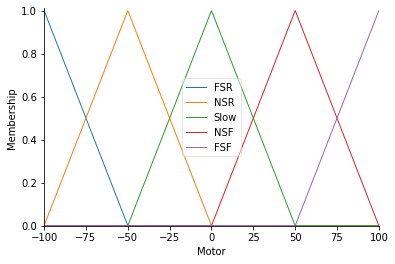

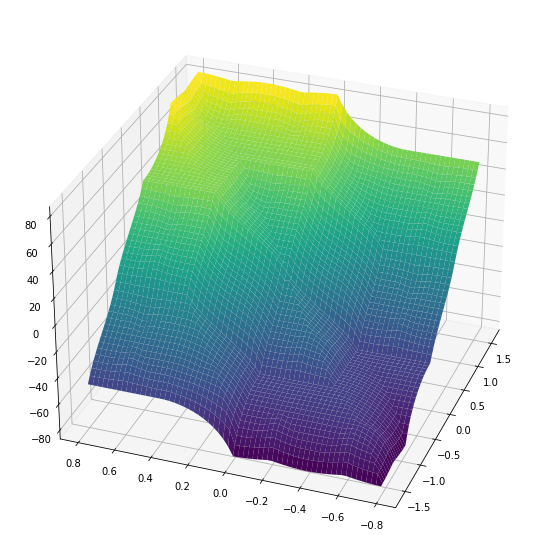

In [ ]:


import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

universea = np.linspace(-np.pi/2,np.pi/2,61)
universeda = np.linspace(-np.pi/4,np.pi/4,61)
universe1 = np.linspace(-100,100,1000)
#Input
a=ctrl.Antecedent(universea,'Anpha')
da=ctrl.Antecedent(universeda,'d_anpha')
#Output
M=ctrl.Consequent(universe1,'Motor')

namea=['LN','N','ZE','P','LP']
nameda=['-2','-1','0','1','2']
namesT=['FSR','NSR','Slow','NSF','FSF']

a.automf(names=namea)
da.automf(names=nameda)
M.automf(names=namesT)

# a.view()
# da.view()
# M.view()

rule = []

rule.append(ctrl.Rule(antecedent=((a['LN'] & da['-2'])|(a['LN'] & da['-1'])|(a['LN'] & da['0'])|
                                  (a['N'] & da['-2'])),consequent=M['FSR'],label='rule FSR'))
rule.append(ctrl.Rule(antecedent=((a['ZE'] & da['-2'])|(a['N'] & da['-1'])|(a['ZE'] & da['-1'])|
                                  (a['N'] & da['0'])|(a['LN'] & da['1'])|(a['LN'] & da['2'])),consequent=M['NSR'],label='rule NSR'))
rule.append(ctrl.Rule(antecedent=((a['P'] & da['-2'])|(a['P'] & da['-1'])|(a['ZE'] & da['0'])|
                                  (a['N'] & da['1'])|(a['N'] & da['2'])),consequent=M['Slow'],label='rule Slow'))
rule.append(ctrl.Rule(antecedent=((a['LP'] & da['-2'])|(a['LP'] & da['-1'])|(a['P'] & da['0'])|
                                  (a['P'] & da['1'])|(a['ZE'] & da['1'])|(a['ZE'] & da['2'])),consequent=M['NSF'],label='rule NSF'))
rule.append(ctrl.Rule(antecedent=((a['LP'] & da['0'])|(a['LP'] & da['1'])|(a['LP'] & da['2'])|(a['P'] & da['2'])),consequent=M['FSF'],label='rule FSF'))
#Control system
motor_ctrl = ctrl.ControlSystem(rule)
motor_simulation=ctrl.ControlSystemSimulation(motor_ctrl)
# Compute
motor_simulation.input['Anpha'] = np.pi/8
motor_simulation.input['d_anpha'] = 1

motor_simulation.compute()

print(motor_simulation.output['Motor'])

# power
M.view(sim = motor_simulation)
#3D
d_ctrl = ctrl.ControlSystem(rule)
d_simulation=ctrl.ControlSystemSimulation(d_ctrl)
upsampled1=np.linspace(-np.pi/2,np.pi/2,61)
upsampled2=np.linspace(-np.pi/4,np.pi/4,61)
x,y = np.meshgrid(upsampled1,upsampled2)
z = np.zeros_like(x)

for i in range(61):
  for j in range(61):
    d_simulation.input['Anpha']=x[i,j]
    d_simulation.input['d_anpha']=y[i,j]
    d_simulation.compute()
    z[i,j]=d_simulation.output['Motor']

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection = '3d')
suf = ax.plot_surface(x,y,z,rstride=1,cstride=1,cmap='viridis',linewidth=0.4,antialiased=True)
ax.view_init(30,200)